<a href="https://colab.research.google.com/github/kleinhartje/project/blob/main/Project_2_Customer_churn_rate_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Data Processing

## Loading and Exploring Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Load the data source : https://www.kaggle.com/code/kmalit/bank-customer-churn-prediction/input
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/Churn_Modelling.csv")

## Exploring Data

In [4]:
# Display 5 rows
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Display the shape of the data
print("Shape of the data:", data.shape)


Shape of the data: (10000, 14)


In [6]:
# Display information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# Identify object categorical columns
object_columns = data.select_dtypes(include="object").columns
print("Object columns:", object_columns)

# Identify numeric columns
num_columns = data.select_dtypes(include=["int64", "float64"]).columns
print("Numeric columns:", num_columns)

Object columns: Index(['Surname', 'Geography', 'Gender'], dtype='object')
Numeric columns: Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [8]:
# Summary statistics of numeric data
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Dealing with with missing data

In [9]:
#Check missing Values

missing_values = data.isnull().values.any()

number_of_missing_values = data.isnull().sum().sum()

if missing_values == True:
  print("Missing values found", number_of_missing_values)
else:
  print("No missing values found")

No missing values found


## Encode the Categorical Data

In [10]:
# Step1 : Check Cat col
data.select_dtypes(include="object").columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [11]:
# Drop insignificant columns
try:
    data = data.drop(["RowNumber", "CustomerId", "Surname"], axis=1)
except KeyError as error:
    print(f"Error dropping columns: {error}")

# One-hot encoding for categorical columns (Geography and Gender)
data_encoded = pd.get_dummies(data, drop_first=True)

# Convert boolean columns to integers (0 and 1)
data_encoded = data_encoded.astype(int)

# Display the first 5 rows of encoded data
data_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


## Visualization with countplot

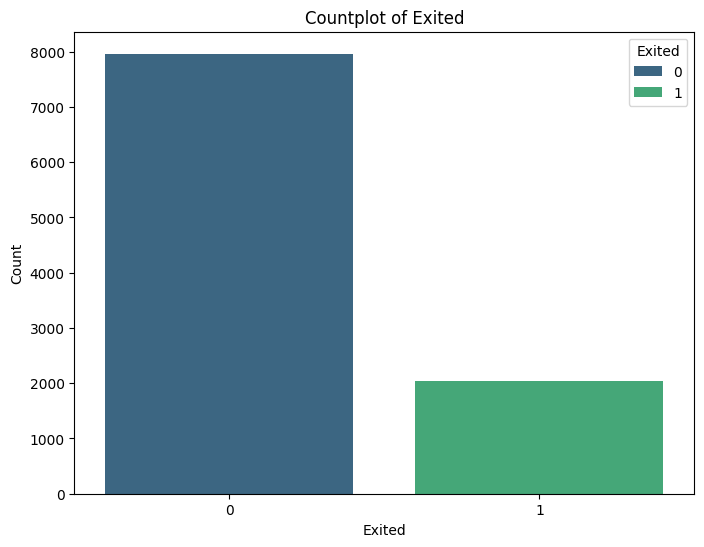

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Exited', data=data, hue='Exited', palette='viridis', dodge=False)
plt.title('Countplot of Exited')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

##  Correlation matrix with the target variable (Exited)

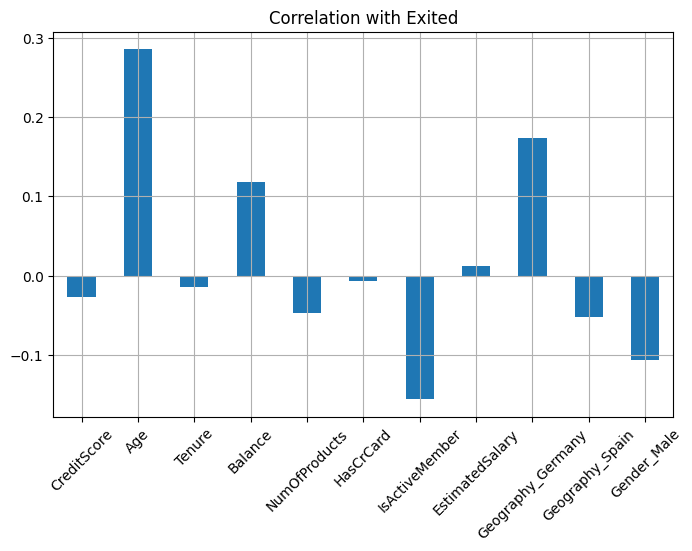

In [13]:
X = data_encoded.drop(["Exited"], axis=1)
correlation_with_target = X.corrwith(data_encoded["Exited"])
correlation_with_target.plot.bar(figsize=(8, 5), title="Correlation with Exited", rot=45, grid=True)
plt.show()

In [14]:
# Calculate the correlation matrix
correlation_matrix = data_encoded.corrwith(data_encoded["Exited"])

# Create a DataFrame from the correlation values
correlation_table = correlation_matrix.reset_index()
correlation_table.columns = ['Variable X', 'Correlation with Exited']


from IPython.display import display
display(correlation_table)

,Variable X,Correlation with Exited
0,CreditScore,-0.027094
1,Age,0.285323
2,Tenure,-0.014001
3,Balance,0.118533
4,NumOfProducts,-0.047820
5,HasCrCard,-0.007138
6,IsActiveMember,-0.156128
7,EstimatedSalary,0.012097
8,Exited,1.000000
9,Geography_Germany,0.173488


## Heatmap of the correlation matrix

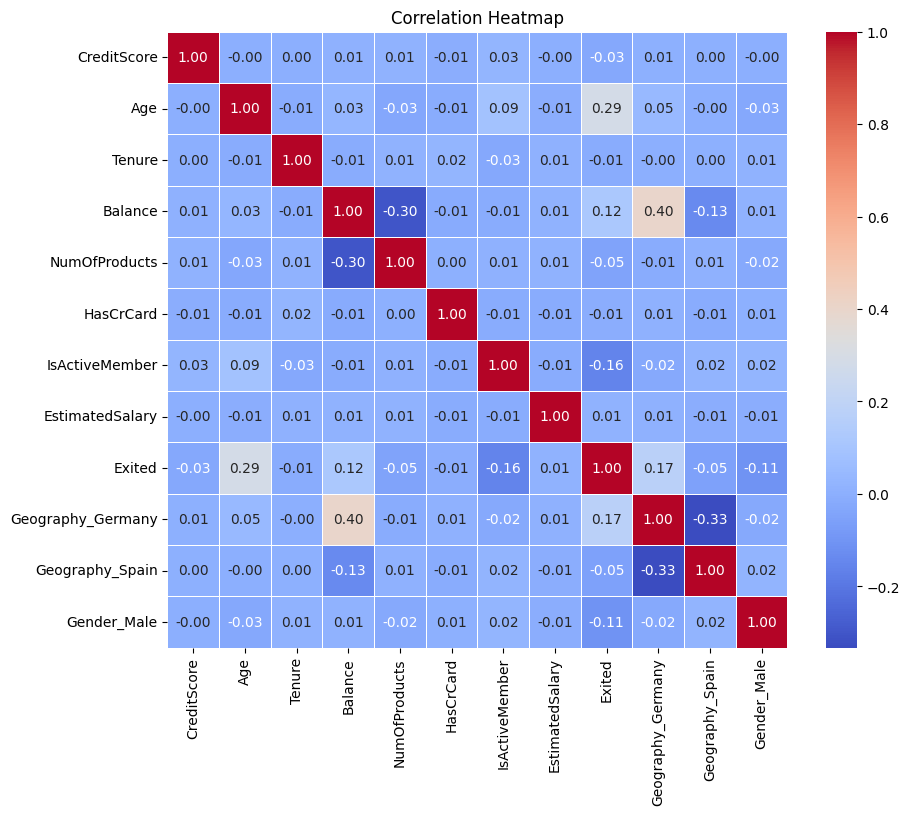

In [15]:
correlation_matrix = data_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Part 2: Data Preparation for Modeling

## Splitting Data into Training and Testing Sets

In [16]:
# Splitting data into X (independent variables) and Y (dependent variable)
X = data_encoded.drop(["Exited"], axis=1)
Y = data_encoded["Exited"]

# Splitting data into training and testing sets (80/20 ratio)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

##  Data Normalization

In [17]:
# Normalizing data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Converting arrays to DataFrames for visualization
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Part 3:  Building and Evaluating the Model

## Logistic Regression Model and Evaluation

In [18]:
# Initializing the logistic regression model
classifier = LogisticRegression(penalty='l2', C=1.0, random_state=42)

# Training the model on the training data
classifier.fit(X_train, Y_train)




LogisticRegression(random_state=42)

In [19]:
# Predicting on the test data
y_pred = classifier.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)


# Displaying metrics in a DataFrame
metrics_df = pd.DataFrame({'Accuracy': [accuracy], 'Precision': [precision], 'Recall': [recall], 'F1-score': [f1]})
print(metrics_df)

   Accuracy  Precision    Recall  F1-score
0     0.811   0.552448  0.201018  0.294776


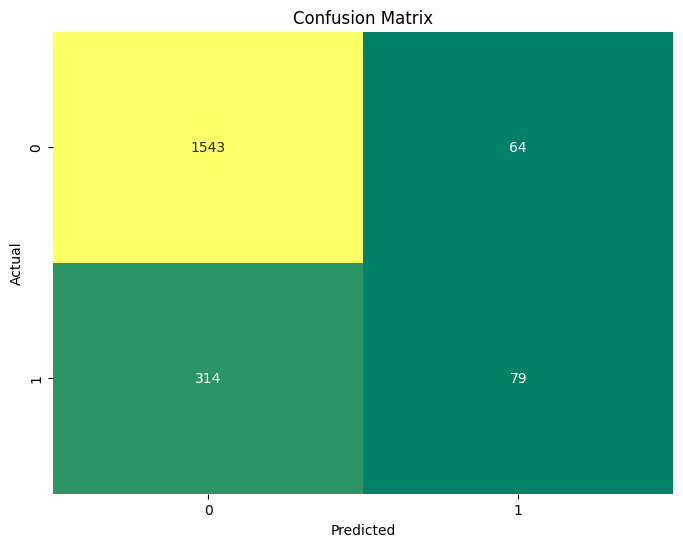

In [25]:
# Confusion matrix
Confusion_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(Confusion_matrix , annot=True, cmap='summer', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [26]:
from sklearn.model_selection import cross_val_score


# Cross-validation to assess model performance
accuracy_values = cross_val_score(estimator=classifier, X=X_train, y=Y_train, cv=10)
mean_accuracy = accuracy_values.mean() * 100
std_deviation = accuracy_values.std()
print(f"Mean Accuracy: {mean_accuracy:.2f}%")
print(f"Standard Deviation: {std_deviation:.4f}")

Mean Accuracy: 80.88%
Standard Deviation: 0.0110
